In [4]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind



In [5]:
# Remoção de colunas com mais de 50% de valores faltantes
df = pd.read_csv("futebol.csv")
limite = len(df) * 0.5  # número mínimo de valores não nulos exigidos
df = df.dropna(axis=1, thresh=limite)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8453 non-null   int64  
 1   data                            8453 non-null   object 
 2   rodada                          8453 non-null   int64  
 3   estadio                         8442 non-null   object 
 4   arbitro                         6743 non-null   object 
 5   publico                         6742 non-null   float64
 6   time_mandante                   8453 non-null   object 
 7   time_visitante                  8453 non-null   object 
 8   tecnico_mandante                6299 non-null   object 
 9   tecnico_visitante               6299 non-null   object 
 10  colocacao_mandante              6743 non-null   float64
 11  colocacao_visitante             6743 non-null   float64
 12  valor_equipe_titular_mandante   63

Média: 2.55
Mediana: 2.0
Moda: [2.0]
Desvio padrão: 1.63
IQR: 3.0


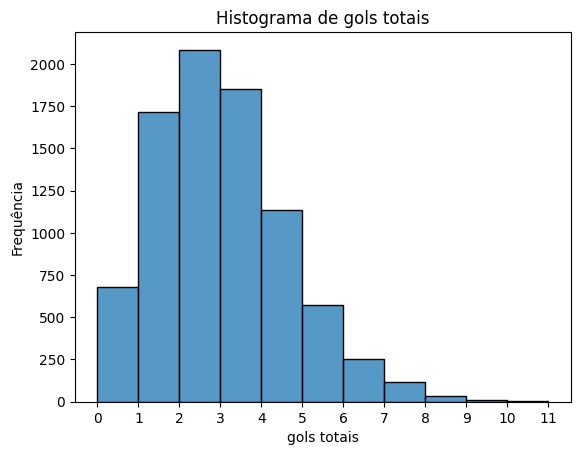

In [6]:
# 1.1 Distribuição de gols
df["gols_total"] = df["gols_mandante"] + df["gols_visitante"]


gols_tot = df["gols_total"]
num_bins = int(gols_tot.max())

sns.histplot(gols_tot, bins=num_bins, kde=False)
plt.xlabel("gols totais")
plt.ylabel("Frequência")
plt.title("Histograma de gols totais")
plt.xticks(np.arange(gols_tot.min(), gols_tot.max() + 1))

media = gols_tot.mean()
mediana = gols_tot.median()
moda = gols_tot.mode().to_list()
desvio = gols_tot.std()
q1 = gols_tot.quantile(0.25)
q3 = gols_tot.quantile(0.75)
iqr = q3 - q1

print(f'Média: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio padrão: {desvio:.2f}')
print(f'IQR: {iqr}')

plt.show()




Outliers Mandante (valor: quantidade):
gols_mandante
4.0    416
5.0    120
6.0     32
7.0      7
Name: count, dtype: int64

Outliers Visitante (valor: quantidade):
gols_mandante
6.0    32
7.0     7
Name: count, dtype: int64

Mandante:
Média: 1.53, Mediana: 1.0, Moda: 1.0

Visitante:
Média: 1.02, Mediana: 1.0, Moda: 0.0


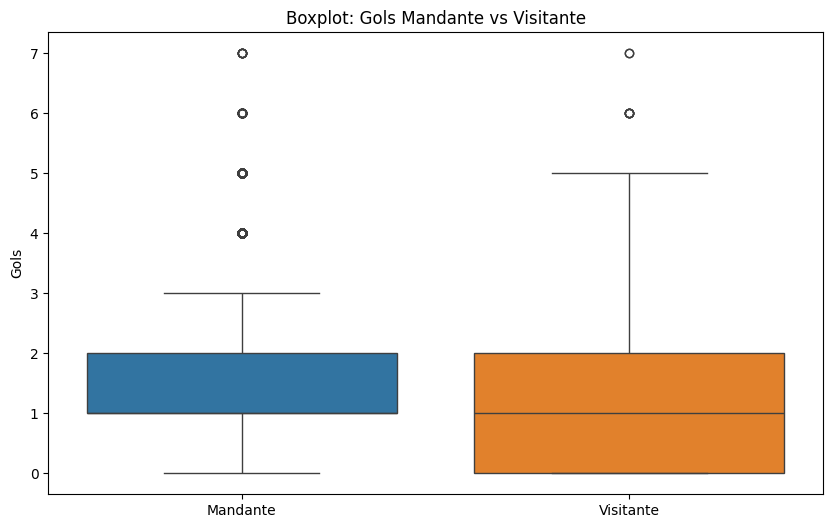

In [7]:
# 1.2 Mando de campo
gols_mand = df["gols_mandante"]
gols_vist = df["gols_visitante"]

#boxplot de comparação
plt.figure(figsize=(10,6))
sns.boxplot(data=[gols_mand, gols_vist])
plt.title('Boxplot: Gols Mandante vs Visitante')
plt.ylabel('Gols')
plt.xticks([0,1], ['Mandante', 'Visitante'])

#identificação dos outliers
q1m = gols_mand.quantile(0.25)
q3m = gols_mand.quantile(0.75)

q1v = gols_vist.quantile(0.25)
q3v = gols_vist.quantile(0.75)

iqrm = q3m - q1m
iqrv = q3v - q1v

limite_inf_m = q1m - 1.5 * iqrm
limite_sup_m = q3m + 1.5 * iqrm

limite_inf_v = q1v - 1.5 * iqrv
limite_sup_v = q3v + 1.5 * iqrv

outliersm = gols_mand[(gols_mand < limite_inf_m) | (gols_mand > limite_sup_m)]
outliersv = gols_mand[(gols_mand < limite_inf_v) | (gols_mand > limite_sup_v)]

df_outliers = pd.DataFrame({
    "Outliers_Mandante": outliersm,
    "Outliers_Visitante": outliersv
})

print("Outliers Mandante (valor: quantidade):")
print(outliersm.value_counts())

print("\nOutliers Visitante (valor: quantidade):")
print(outliersv.value_counts())

#medidas de tendencia central
media_mandante = gols_mand.mean()
mediana_mandante = gols_mand.median()
moda_mandante = gols_mand.mode()[0]

media_visitante = gols_vist.mean()
mediana_visitante = gols_vist.median()
moda_visitante = gols_vist.mode()[0]


print('\nMandante:')
print(f'Média: {media_mandante:.2f}, Mediana: {mediana_mandante}, Moda: {moda_mandante}')
print('\nVisitante:')
print(f'Média: {media_visitante:.2f}, Mediana: {mediana_visitante}, Moda: {moda_visitante}')

plt.show()

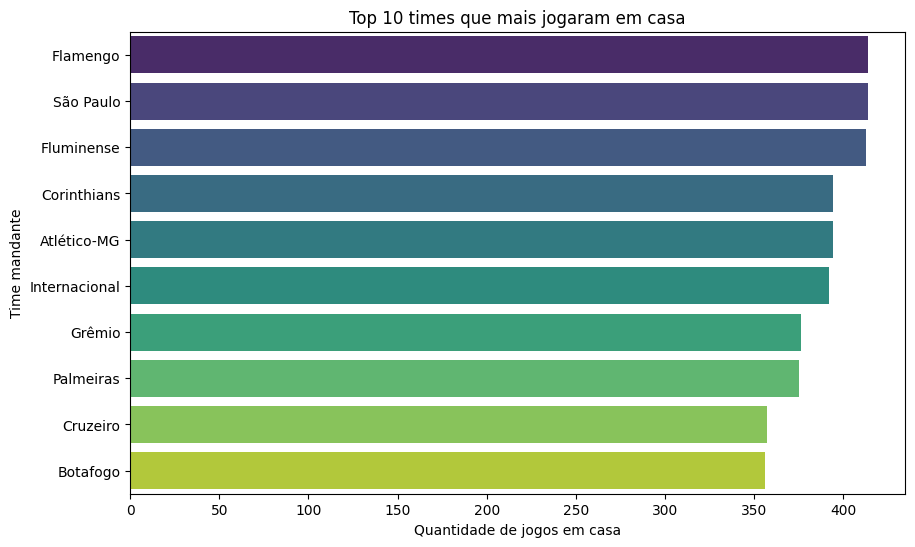

In [8]:
# 1.3 Público: análise de mandos e estatísticas

# Gráfico de barras: 10 times que mais jogaram em casa
times_mandantes = df['time_mandante']
top_mandantes = times_mandantes.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_mandantes.values, y=top_mandantes.index, hue=top_mandantes.index, palette='viridis', legend=False)
plt.title('Top 10 times que mais jogaram em casa')
plt.xlabel('Quantidade de jogos em casa')
plt.ylabel('Time mandante')
plt.show()



In [9]:
# Estatísticas descritivas do público (apenas dados não-nulos)
publico_validos = df['publico'].dropna()
estatisticas_publico = publico_validos.describe()
print('Estatísticas descritivas do público (não-nulo):')
print(estatisticas_publico)

Estatísticas descritivas do público (não-nulo):
count     6742.000000
mean     16189.951943
std      14074.412391
min          0.000000
25%       5898.250000
50%      12685.500000
75%      22963.250000
max      82044.000000
Name: publico, dtype: float64


Correlação entre público e gols totais: -0.01


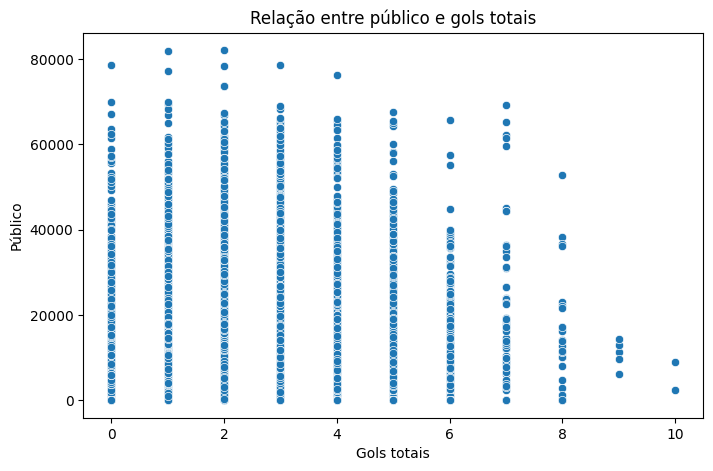

In [10]:
# Relação entre público e gols totais
df_validos = df.dropna(subset=['publico', 'gols_total'])
correlacao = df_validos['publico'].corr(df_validos['gols_total'])
print(f"Correlação entre público e gols totais: {correlacao:.2f}")

# Visualização
plt.figure(figsize=(8,5))
sns.scatterplot(x='gols_total', y='publico', data=df_validos)
plt.title('Relação entre público e gols totais')
plt.xlabel('Gols totais')
plt.ylabel('Público')
plt.show()

1- A distribuição de gols é simétrica ou assimétrica? O que isso indica?
A distribuição de gols é assimétrica para ambas as equipes, tanto mandantes quanto visitantes. Isso é evidenciado pela cauda longa da distribuição, representada pelos outliers (pontos isolados) na parte superior do gráfico, indicando a ocorrência de placares com um número de gols significativamente alto. Em estatística, essa distribuição é conhecida como assimétrica positiva ou com assimetria à direita e sugere que a maioria dos jogos tem poucos gols, mas há uma pequena quantidade de partidas com um número de gols muito maior do que a média.

2- Há vantagem numérica do mando de campo?
Sim, há uma vantagem numérica clara para a equipe mandante em termos de gols marcados.

Mediana: A linha central da caixa no boxplot, que representa a mediana, mostra que a mediana de gols dos mandantes está em 1, enquanto a dos visitantes está em 0 (embora o boxplot sugira que a mediana dos visitantes esteja um pouco acima de 1, o código indica que a mediana é na verdade 1, mas visualmente parece ser 1). A mediana é uma medida de tendência central robusta. Isso indica que em 50% dos jogos, os mandantes marcaram no mínimo 1 gol.

Quartil: A caixa do boxplot, que representa os quartis, também aponta para a vantagem do time da casa. A caixa dos mandantes (gols de 1 a 2) é mais alta do que a dos visitantes (gols de 0 a 2), indicando uma maior frequência de gols para os mandantes. A distribuição dos gols dos mandantes está deslocada para cima em relação à distribuição dos gols dos visitantes.

Outliers: Há mais outliers na parte superior para os mandantes, indicando que eles são mais propensos a marcar um grande número de gols em um jogo do que os visitantes. O número de gols marcados em um jogo por um mandante pode chegar até 7, enquanto para os visitantes o máximo é 6.

3- De acordo com a visualização feita, não existe uma relação direta entre público e gols totais.




In [11]:
#2.1 Teste de Hipótese

#Contexto: Quantificar estatisticamente se a “vantagem do mando de campo” existe.

#Hipótese: “Times mandantes marcam significativamente mais gols que visitantes"

#Hipóteses
# H0: μmandante = μvisitante
# H1: μmandante > μvisitante

gols_mand_clean = gols_mand.dropna()
gols_vist_clean = gols_vist.dropna()

#diferenca de media 
dif_media = gols_mand_clean.mean() - gols_vist_clean.mean()

alfa = 0.05

#Significancia e Relevancia
pooled_std = np.sqrt(((gols_mand.std()**2) + (gols_vist.std()**2)) / 2)
cohen_d = dif_media / pooled_std

teste_t, p_valor = ttest_ind(gols_mand_clean, gols_vist_clean, alternative='greater', equal_var=False)

if (gols_mand_clean.mean() > gols_vist_clean.mean()) and (p_valor < alfa):
    print("Rejeitamos H0: existe vantagem do mando de campo")
else:
    print("Não rejeitamos H0: não há evidência de vantagem por parte dos mandantes")

print(f'\nEstatística t: {teste_t:.2f}')
print('Valor-p:', p_valor)
print(f'Diferença prática das médias: {dif_media:.2f}')
print("Cohen's d:", cohen_d)
print(f'Média de gols dos mandantes: {gols_mand_clean.mean():.2f}')
print(f'Média de gols dos visitantes: {gols_vist_clean.mean():.2f}')


Rejeitamos H0: existe vantagem do mando de campo

Estatística t: 29.19
Valor-p: 5.930640620738778e-183
Diferença prática das médias: 0.51
Cohen's d: 0.4490170362528286
Média de gols dos mandantes: 1.53
Média de gols dos visitantes: 1.02


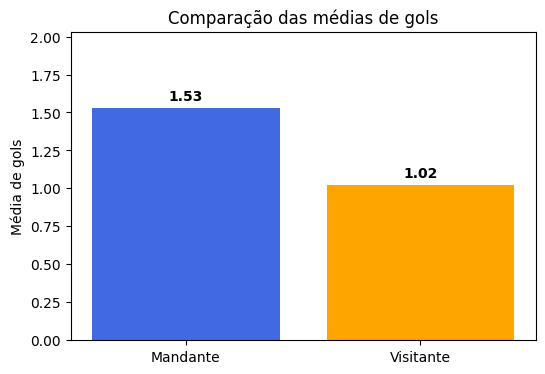

In [12]:
#Visualizacao 
medias = [gols_mand_clean.mean(), gols_vist_clean.mean()]
labels = ['Mandante', 'Visitante']

plt.figure(figsize=(6,4))
plt.bar(labels, medias, color=['royalblue', 'orange'])
plt.ylabel('Média de gols')
plt.title('Comparação das médias de gols')
plt.ylim(0, max(medias) + 0.5)
for i, v in enumerate(medias):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')
plt.show()

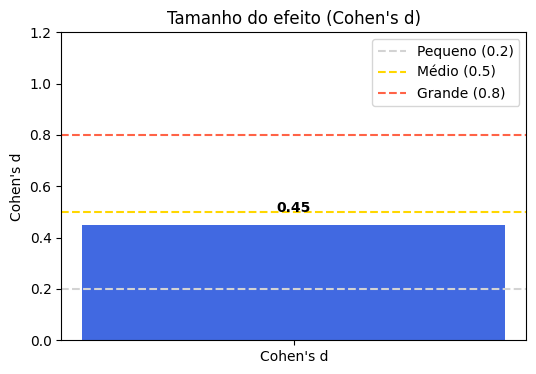

In [13]:
cohen_d_val = cohen_d
categorias = ['Pequeno', 'Médio', 'Grande']
limites = [0.2, 0.5, 0.8]
cores = ['lightgray', 'gold', 'tomato']

plt.figure(figsize=(6,4))
plt.bar(['Cohen\'s d'], [cohen_d_val], color='royalblue')
plt.axhline(y=limites[0], color=cores[0], linestyle='--', label='Pequeno (0.2)')
plt.axhline(y=limites[1], color=cores[1], linestyle='--', label='Médio (0.5)')
plt.axhline(y=limites[2], color=cores[2], linestyle='--', label='Grande (0.8)')
plt.ylabel('Cohen\'s d')
plt.title('Tamanho do efeito (Cohen\'s d)')
plt.legend()
plt.ylim(0, max(cohen_d_val, 1.2))
plt.text(0, cohen_d_val + 0.05, f'{cohen_d_val:.2f}', ha='center', fontweight='bold')
plt.show()

O valor-p permite rejeitar H0? 
R: Sim, o valor-p obtido é significativamente menor que o nível de significância (alpha = 0.05).

Qual a diferença prática em gols?
R: A diferença prática em gols é de 0,51.

O resultado é significativo E relevante?
R: Sim. O resultado é estatisticamente significativo (valor-p baixo) e apresenta relevância prática: a diferença das médias é moderada e o tamanho do efeito (Cohen's d) indica impacto real entre os grupos analisados.

In [ ]:
# 3.1 Investigação livre
# 1: publico dependendo do estádio

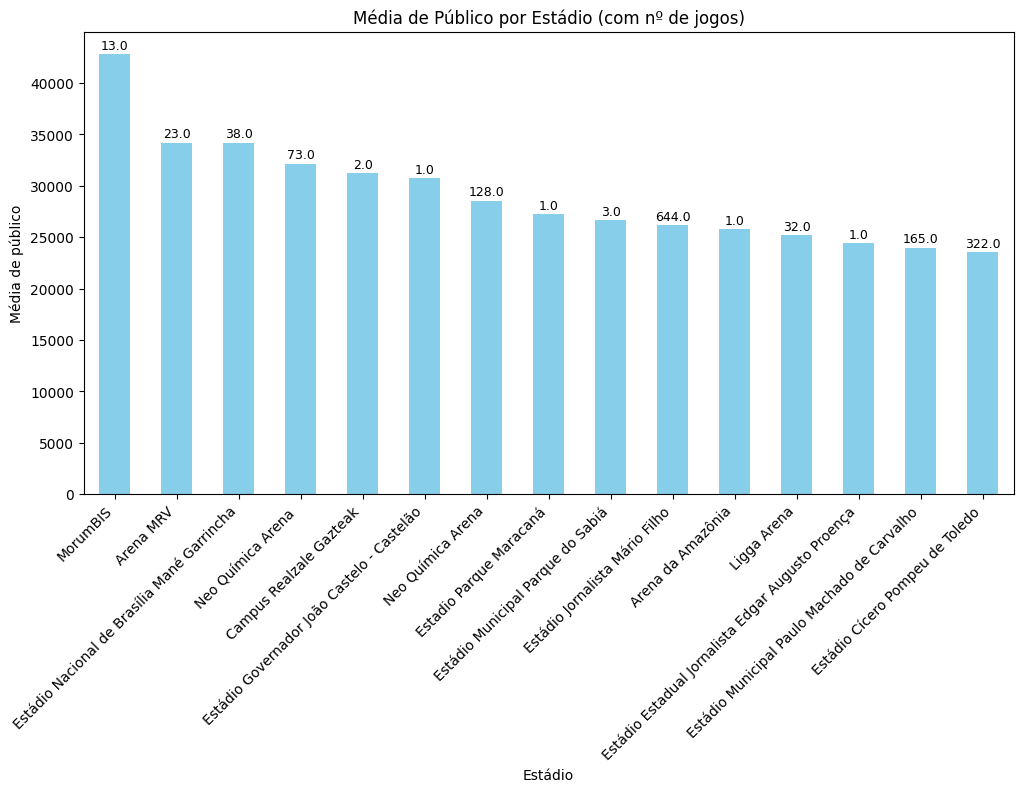

In [ ]:
# Agrupando dados
publico_por_estadio = (
    df.groupby("estadio")["publico"]
      .agg(["count", "mean"])
      .sort_values("mean", ascending=False)
)

# Plotando
plt.figure(figsize=(12,6))
ax = publico_por_estadio["mean"].head(15).plot(kind="bar", color="skyblue")

# Adicionando os rótulos com o número de jogos
for i, (estadio, row) in enumerate(publico_por_estadio.head(15).iterrows()):
    ax.text(i, row["mean"] + 500, f'{row["count"]}', ha="center", fontsize=9)

plt.title("Média de Público por Estádio (com nº de jogos)")
plt.ylabel("Média de público")
plt.xlabel("Estádio")
plt.xticks(rotation=45, ha="right")
plt.show()